In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
from scipy.stats import norm, skew
from collections import Counter
%matplotlib inline

In [ ]:
data= pd.read_csv('file.csv')

In [ ]:
data.head()

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.isnull().sum().sum()

0

# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">MAX Positive & negative correlation</p>

In [ ]:
max = 0
x=0
for i in data.select_dtypes(include=np.number).drop(['malware'],axis=1).columns:
    if (data[i].corr(data['malware'])) > max:
        max = data[i].corr(data['malware'])
        x = i
print("The column which has the maximum positive correlation with the malware case is: {0}" .
      format(x))

The column which has the maximum positive correlation with the malware case is: RtlUnwind


In [ ]:
min = 1
x=0
for i in data.select_dtypes(include=np.number).drop(['malware'],axis=1).columns:
    if (data[i].corr(data['malware'])) < min:
        min = data[i].corr(data['malware'])
        x = i
print("The column which has the maximum negative correlation with the malware case is: {0}" .
      format(x))

The column which has the maximum negative correlation with the malware case is: _cexit


# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">Rank of most columns that affect in malware case </p>

In [ ]:
corr = data.corr()
rank = corr.sort_values(by=['malware'],ascending=False).iloc[0].sort_values(ascending=False)

In [ ]:
rankk = pd.DataFrame(rank)
corrr = pd.DataFrame(corr)
rankk[(rankk['malware'] > 0.4) | (rankk['malware'] < -0.4)]

,malware
malware,1.000000
_exit,-0.408869
_initterm,-0.421305
__setusermatherr,-0.422460
__set_app_type,-0.438921
exit,-0.458680
_cexit,-0.541799


# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">Detailed Relation between those columns & malware</p>

In [ ]:
x=data[data['malware']==0]['_cexit'].value_counts()
y=data[data['malware']==1]['_cexit'].value_counts()
pd.concat([x, y], axis=1, keys=['Benign', 'malicious'])

,Benign,malicious
0,1045,45228
1,884,423


In [ ]:
x=data[data['malware']==0]['exit'].value_counts()
y=data[data['malware']==1]['exit'].value_counts()
pd.concat([x, y], axis=1, keys=['Benign', 'malicious'])

,Benign,malicious
0,1045,44774
1,884,877


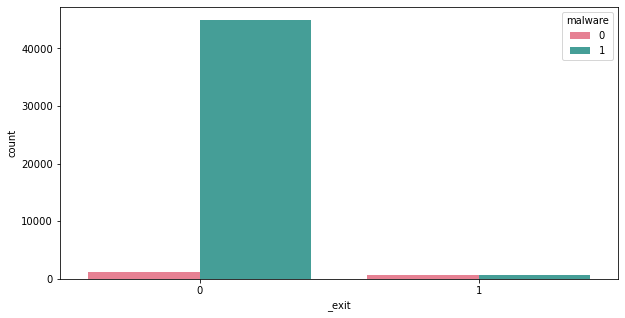

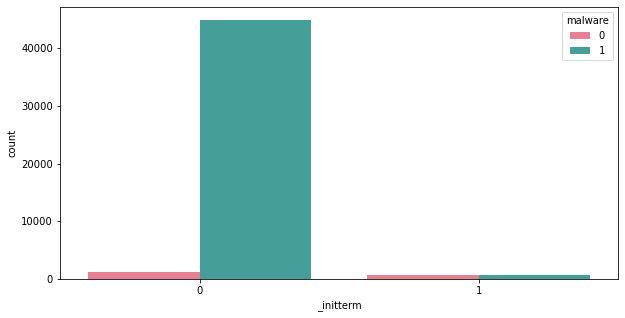

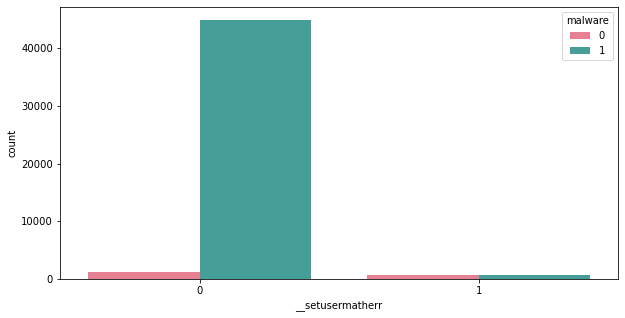

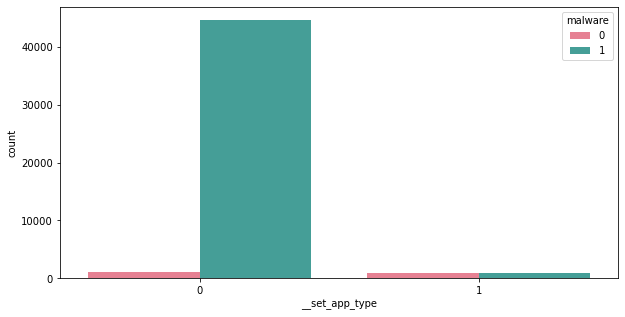

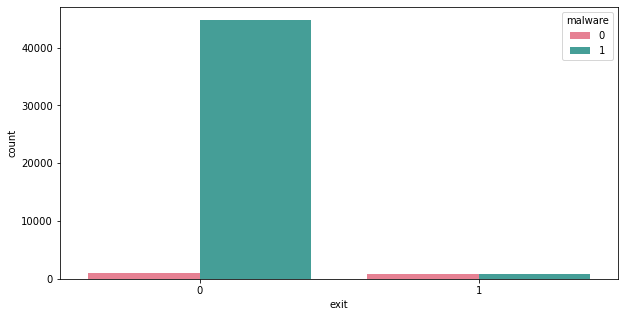

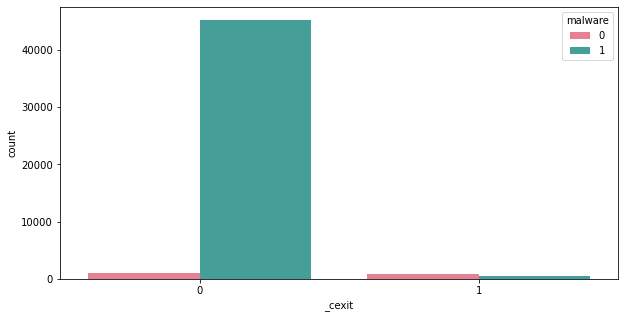

In [ ]:
plt.figure(figsize = (10,5)) 
sns.countplot(x="_exit",hue = "malware", data=data, palette="husl");
plt.figure(figsize = (10,5)) 
sns.countplot(x="_initterm",hue = "malware", data=data, palette="husl");
plt.figure(figsize = (10,5)) 
sns.countplot(x="__setusermatherr",hue = "malware", data=data, palette="husl");
plt.figure(figsize = (10,5)) 
sns.countplot(x="__set_app_type",hue = "malware", data=data, palette="husl");
plt.figure(figsize = (10,5)) 
sns.countplot(x="exit",hue = "malware", data=data, palette="husl");
plt.figure(figsize = (10,5)) 
sns.countplot(x="_cexit",hue = "malware", data=data, palette="husl");

# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">Splitting dataset</p>

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['hash','malware'], axis=1)
y = data['malware']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">NORMAL Random Forests</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=3)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  384   204]
 [   56 13630]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75       588
           1       0.99      1.00      0.99     13686

    accuracy                           0.98     14274
   macro avg       0.93      0.82      0.87     14274
weighted avg       0.98      0.98      0.98     14274



In [ ]:
print("Train Accuracy:",rfc.score(X_train, y_train) )#accuracy
print( "Test Accuracy:", accuracy_score(y_test, rfc_pred, normalize=True))

Train Accuracy: 0.9907824416021137
Test Accuracy: 0.9817850637522769


# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">Random Forests with only important features</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=3)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=3)

In [ ]:
#Find Important features
importances= pd.DataFrame({'Feature': X_train.columns, 'Importance': np.round((rf.feature_importances_ * 100),3)})
importances= importances.sort_values('Importance', ascending=False).set_index('Feature')

importances.loc[importances['Importance']> 0.2]

,Importance
Feature,
_cexit,3.259
__p__fmode,3.018
_exit,2.491
exit,2.292
__set_app_type,1.823
...,...
lstrcmpA,0.202
GetExitCodeProcess,0.202
MapViewOfFile,0.201


In [ ]:
features= importances.loc[importances['Importance']> 0.2].index.to_list()
mal= ['malware']
columns= features + mal

columns

['_cexit',
 '__p__fmode',
 '_exit',
 'exit',
 '__set_app_type',
 '_initterm',
 'SetUnhandledExceptionFilter',
 'QueryPerformanceCounter',
 'InterlockedCompareExchange',
 '_controlfp',
 '__p__commode',
 'InterlockedExchange',
 'VirtualAlloc',
 '_onexit',
 'free',
 'malloc',
 '__setusermatherr',
 'memset',
 'memcpy',
 '__getmainargs',
 '_XcptFilter',
 'VirtualFree',
 'VirtualProtect',
 'GetModuleHandleA',
 'UnhandledExceptionFilter',
 'Sleep',
 'GetCurrentProcessId',
 'SetFilePointer',
 'IsDlgButtonChecked',
 'WriteFile',
 'TerminateProcess',
 'RegCloseKey',
 'GetDC',
 'GetSystemTimeAsFileTime',
 'ExitProcess',
 'GetTickCount',
 'LoadLibraryW',
 'GetCurrentThreadId',
 'MessageBoxIndirectW',
 'gethostbyname',
 'TlsGetValue',
 'HeapSetInformation',
 'WSAStartup',
 'LoadLibraryA',
 'wvsprintfW',
 'MessageBoxA',
 'GetStartupInfoA',
 'GetPrivateProfileStringW',
 'IsDebuggerPresent',
 'GetTextExtentPoint32W',
 'GetACP',
 'CopyFileW',
 'SHGetMalloc',
 'VariantInit',
 'WaitForSingleObject',
 'He

In [ ]:
#Keep only important features

df=data[columns]

In [ ]:
y= df['malware']
X= df.drop(['malware'], axis=1)
print("X Shape: ", X.shape)
print("Y Shape: ", y.shape)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

X Shape:  (47580, 93)
Y Shape:  (47580,)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, 
                            random_state=3, 
                            bootstrap= True,
                            max_depth= 110,
                            max_features= 3,
                            min_samples_leaf= 2,
                            min_samples_split= 3)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=2,
                       min_samples_split=3, random_state=3)

In [ ]:
y_pred= rf.predict(X_test)

print("Train Accuracy:",rf.score(X_train, y_train) )#accuracy
print( "Test Accuracy:", accuracy_score(y_test, y_pred, normalize=True))

Train Accuracy: 0.9786149642707019
Test Accuracy: 0.9781420765027322
